In [65]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

In [66]:
CATEGORIES = ['buildings','forest','glacier','mountain','sea','street']
img_size = 100

In [67]:
def prepare_data(dir):
    data = []
    for i in CATEGORIES:
        path = os.path.join(dir, i)
        class_num = CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_img_array = cv2.resize(img_array, (img_size, img_size))
                data.append([new_img_array, class_num])
            except Exception as e:
                pass
    return data

In [68]:
training_data = prepare_data('seg_train/seg_train')

In [69]:
len(training_data)

14034

In [70]:
# Shuffel
random.shuffle(training_data)
training_data[:2]

[[array([[138, 140, 132, ..., 118, 118, 120],
         [172, 154, 141, ..., 118, 119, 120],
         [177, 152, 139, ..., 119, 120, 120],
         ...,
         [ 49,  52,  62, ...,  40,  40,  40],
         [ 55,  67,  81, ...,  42,  41,  41],
         [ 43,  43,  45, ...,  44,  43,  43]], dtype=uint8),
  4],
 [array([[206, 207, 207, ..., 187, 187, 187],
         [208, 208, 208, ..., 186, 186, 186],
         [208, 208, 208, ..., 186, 185, 185],
         ...,
         [129, 143, 116, ...,  14,  32,  30],
         [131, 144, 153, ...,  22,  37,  37],
         [119, 162, 137, ...,  35,  46,  44]], dtype=uint8),
  2]]

In [71]:
def splite_data(data):
    x = []
    y = []

    for feature, label in data:
        x.append(feature)
        y.append(label)

    x = np.array(x)
    y = np.array(y)
    return x, y

In [72]:
x_train, y_train = splite_data(training_data)

In [73]:
y_train[:5]

array([4, 2, 4, 1, 0])

In [74]:
x_train.shape

(14034, 100, 100)

In [75]:
validation_data = prepare_data('seg_test/seg_test')
random.shuffle(validation_data)

In [76]:
len(validation_data)

3000

In [77]:
x_val, y_val = splite_data(validation_data)

In [78]:
x_val.shape

(3000, 100, 100)

In [79]:
y_val.shape

(3000,)

In [80]:
# Reshape and scale

x_train = x_train.reshape(-1, img_size, img_size, 1) / 255.0
x_val = x_val.reshape(-1, img_size, img_size, 1) / 255.0

In [81]:
x_train.shape

(14034, 100, 100, 1)

In [82]:
x_val.shape

(3000, 100, 100, 1)

In [83]:
y_val.shape

(3000,)

In [84]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=6)
y_val = to_categorical(y_val, num_classes=6)

In [85]:
y_val.shape

(3000, 6)

### CNN

In [112]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.30))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.30))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.30))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.30))

model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
# model summary

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,647,366 (13.91 MB)

 Trainable params: 3,647,366 (13.91 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(optimizer='Adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [115]:
y_train.shape

(14034, 6)

In [116]:
model.fit(x_train, y_train, batch_size=32, epochs=25, validation_data=(x_val, y_val))

Epoch 1/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.4325 - loss: 1.3952 - val_accuracy: 0.6207 - val_loss: 1.0298
Epoch 2/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.6669 - loss: 0.8911 - val_accuracy: 0.7590 - val_loss: 0.7000
Epoch 3/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7286 - loss: 0.7235 - val_accuracy: 0.7787 - val_loss: 0.6071
Epoch 4/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7683 - loss: 0.6353 - val_accuracy: 0.7840 - val_loss: 0.5939
Epoch 5/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7885 - loss: 0.5654 - val_accuracy: 0.8040 - val_loss: 0.5430
Epoch 6/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8161 - loss: 0.4981 - val_accuracy: 0.7930 - val_loss: 0.5718
Epoch 7/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8357 - loss: 0.4467 - val_accuracy: 0.7890 - val_loss: 0.6292
Epoch 8/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8400 - loss: 0.4347 - 

In [117]:
from sklearn.metrics import classification_report

y_pred_prob = model.predict(x_val)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred, digits=4))

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
              precision    recall  f1-score   support

           0     0.8413    0.7277    0.7804       437
           1     0.9273    0.9684    0.9474       474
           2     0.7249    0.7577    0.7409       553
           3     0.6619    0.7981    0.7237       525
           4     0.8714    0.7039    0.7787       510
           5     0.8333    0.8383    0.8358       501

    accuracy                         0.7980      3000
   macro avg     0.8100    0.7990    0.8011      3000
weighted avg     0.8058    0.7980    0.7985      3000



In [118]:
model.save(r'intel_image.h5')

In [119]:
from tensorflow.keras.models import load_model

model = load_model('intel_image.h5')

In [126]:
import cv2
def prepare_external_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    return img.reshape(1, 100, 100, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
0


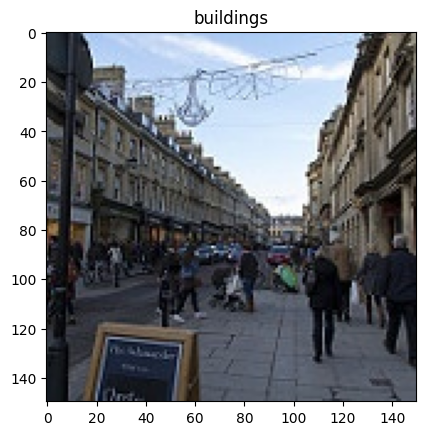

In [136]:
image = 'seg_pred/seg_pred/9845.jpg'
prediction = model.predict(prepare_external_image(image))
pred_label = round(prediction[0][0])

print(round(prediction[0][0]))
label = "buildings" if pred_label == 0 else \
        "forest" if pred_label == 1 else \
        "glacier" if pred_label == 2 else \
        "mountain" if pred_label == 3 else \
        "sea" if pred_label == 4 else \
        "street"

img = plt.imread(image)
plt.imshow(img, cmap='gray')
plt.title(label)
plt.show()